# Linear Programming in Python Tutorial

## **1. Introduction to Linear Programming**

# What is Linear Programming (LP)?

Linear Programming is a mathematical optimization technique used to achieve the best outcome in a given scenario, often involving maximizing profit or minimizing cost. The key idea behind LP is to find the best values for a set of variables that meet certain conditions (called constraints).

Example Problem: Imagine you are running a small factory. You produce two types of products, Product A and Product B. Each product requires resources like time, materials, and labor. You want to determine how much of each product to produce in order to maximize your profit while staying within the limits of your available resources. This is where linear programming comes in!

Package Documentation (if interested)
- [SciPy Documentation](https://scipy.org/)
- [PuLP Documentation](https://coin-or.github.io/pulp/)

## **2. Mathematical Formulation**

In LP, we need to define three main components:
1. **Objective Function**: This is what we want to optimize (either maximize or minimize). For example, we want to maximize profit.
2. **Constraints**: These are the limits or conditions that must be satisfied, such as available resources.
3. **Decision Variables**: These are the variables we want to find values for. In our example, the decision variables could be the number of Product A and Product B to produce.

Objective Function: Maximize profit (e.g., P = x1 + 2*x2)
Constraints:

2*x1 + x2 <= 20  (e.g., Resource limit for Product A and B)

x1 + 2*x2 <= 20  (e.g., Another resource limit)

Let's see how we can solve this using Python!

## **3. Tools in Python for Linear Programming**

Before we start coding, we need to install and import some Python libraries that will help us solve Linear Programming problems.

We will use two popular libraries:
- **SciPy**: A library for scientific and technical computing, which includes optimization functions. It provides a powerful method called `linprog` for solving linear programming problems.
- **Pulp**: A library that makes it easy to describe and solve linear programming problems in a more human-readable way. Pulp provides an intuitive interface for defining variables, objectives, and constraints.

In [1]:
# Package imports
!pip install scipy pulp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from pulp import LpMaximize, LpProblem, LpVariable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.7 MB/s eta 0:00:00


## **4. Example 1: Using SciPy for Linear Programming**

In [2]:
# Define objective function coefficients

# In this example, we want to maximize the function: P = x1 + 2*x2
# Since SciPy minimizes functions by default, we use negative values for maximization
c = [-1, -2]

# Define inequality constraints

# Constraints are represented in the form Ax <= b
# A represents the coefficients of the constraints, and b represents the upper bounds

A = [[2, 1], [1, 2]]  # Coefficients for the constraints
b = [20, 20]  # Upper bounds for the constraints

# Set variable bounds (x1 >= 0, x2 >= 0)
# We specify that both x1 and x2 must be non-negative
x_bounds = [(0, None), (0, None)]

# Solve the linear programming problem
# We use the `linprog` function to solve the LP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

In [18]:
# Print the results
if result.success:
    print(f"Optimal solution found:")
    print(f"x1: {result.x[0]:.2f}, x2: {result.x[1]:.2f}")
    print(f"Maximum profit: {-result.fun:.2f}")
else:
    print("No solution found.")

Optimal solution found:
x1: 0.00, x2: 10.00
Maximum profit: 20.00


## **5. Visualization of Solution Space**

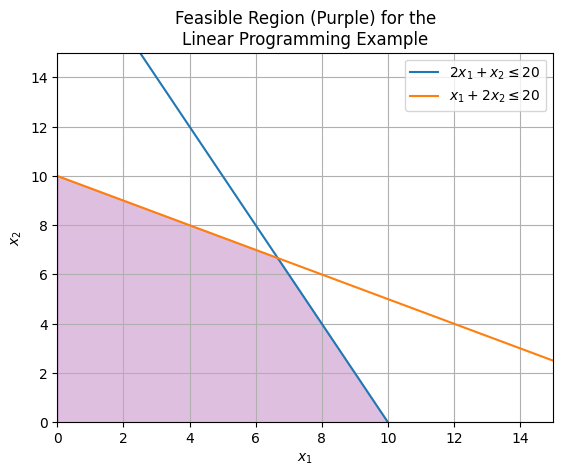

In [16]:
# Define the constraints and plot the feasible region
# We use matplotlib to visualize the constraints and feasible region
x = np.linspace(0, 15, 200)  # Generate values for x from 0 to 15

y1 = (20 - 2 * x)  # Constraint 1
y2 = (20 - x) / 2  # Constraint 2

# Plot the constraints
plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 20$');
plt.plot(x, y2, label=r'$x_1 + 2x_2 \leq 20$');

# Fill the feasible region
# The feasible region is the area where all constraints are satisfied
plt.fill_between(x, 0, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >= 0),
                 alpha=0.25,
                 color='purple')

# Label the plot
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
# Add legend
plt.legend()
# Set axes limits (better plot)
plt.xlim((0, 15))
plt.ylim((0, 15))
plt.title("Feasible Region (Purple) for the\nLinear Programming Example")
plt.grid(True)
plt.show();

## **6. Example 2: Using Pulp for Linear Programming**

Here, we'll do the same example using Pulp, which is more intuitive than using SciPy.

In [11]:
# Define the problem using Pulp
# We create an instance of the LpProblem class
# LpMaximize indicates that we want to maximize the objective function
model = LpProblem(name="simple-max-problem", sense=LpMaximize)

# Define decision variables
# We define our decision variables x1 and x2, which must be non-negative
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

# Objective function
# We add the objective function to the model
model += 1 * x1 + 2 * x2, "Objective"

# Constraints
# We add the constraints to the model
model += (2 * x1 + 1 * x2 <= 20, "Constraint 1")
model += (1 * x1 + 2 * x2 <= 20, "Constraint 2")

# Solve the problem
# We use the solve() method to find the optimal solution
model.solve()

1

In [19]:
# Print the results
print("Optimal solution found:")

# Loop to get var names and value
for var in model.variables():
    print(f"{var.name}: {var.value()}")

# Output max profit found
print(f"Maximum profit: {model.objective.value()}")

Optimal solution found:
x1: 0.0
x2: 10.0
Maximum profit: 20.0
